# CNN on MNSIT DATASET USING KERAS SEQUENSTIAL API

## Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline


In [2]:
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
tf.__version__

'1.3.0'

## Load Data

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [11]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [15]:
data.test.cls = np.argmax(data.test.labels, axis=1)

## Data Dimensions

In [13]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
# This is used for plotting the images.
img_shape = (img_size, img_size)

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = (img_size, img_size, 1)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [16]:
def plot_images(images, class_true, class_pred=None):
    assert len(images) == len(class_true) == 9
    
    # Create figure with 3x3 sub-plots.
    f, ax = plt.subplots(3, 3)
    f.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(ax.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if class_pred is None:
            xlabel = "True: {0}".format(class_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(class_true[i], class_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

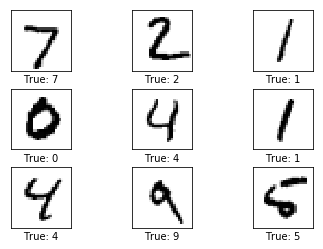

In [17]:
images = data.test.images[0:9]

# Get the true classes for those images.
class_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, class_true=class_true)

In [44]:
def plot_example_errors(class_pred):
    # class_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (class_pred != data.test.cls)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    class_pred = class_pred[incorrect]

    # Get the true classes for those images.
    class_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                class_true=class_true[0:9],
                class_pred=class_pred[0:9])
def plot_example_classified(class_pred):
    # class_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    correct = (class_pred == data.test.cls)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[correct]
    
    # Get the predicted classes for those images.
    class_pred = class_pred[correct]

    # Get the true classes for those images.
    class_true = data.test.cls[correct]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                class_true=class_true[0:9],
                class_pred=class_pred[0:9])

## Sequential Model

In [26]:
from keras.models import InputLayer
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from keras.optimizers import Adam

In [24]:
# Start construction of the Keras Sequential model.
model = Sequential()

# Add an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
model.add(InputLayer(input_shape=(img_size_flat,)))

# The input is a flattened array with 784 elements,
# but the convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape(img_shape_full))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# First fully-connected / dense layer with ReLU-activation.
model.add(Dense(128, activation='relu'))

# Last fully-connected / dense layer with softmax-activation
# for use in classification.
model.add(Dense(num_classes, activation='softmax'))

In [30]:
adam = Adam(lr=1e-3)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
__________

## Training the model

In [58]:
model.fit(x=data.train.images,
           y=data.train.labels,
           epochs=10, batch_size=1024)

Epoch 1/10
55000/55000 [==============================] - 115s 2ms/step - loss: 0.0059 - acc: 0.9988
Epoch 2/10
55000/55000 [==============================] - 116s 2ms/step - loss: 0.0060 - acc: 0.9989
Epoch 3/10
55000/55000 [==============================] - 113s 2ms/step - loss: 0.0055 - acc: 0.9989
Epoch 4/10
55000/55000 [==============================] - 113s 2ms/step - loss: 0.0054 - acc: 0.9991
Epoch 5/10
55000/55000 [==============================] - 128s 2ms/step - loss: 0.0047 - acc: 0.9991
Epoch 6/10
55000/55000 [==============================] - 119s 2ms/step - loss: 0.0041 - acc: 0.9993
Epoch 7/10
55000/55000 [==============================] - 119s 2ms/step - loss: 0.0038 - acc: 0.9994
Epoch 8/10
55000/55000 [==============================] - 115s 2ms/step - loss: 0.0035 - acc: 0.9994
Epoch 9/10
55000/55000 [==============================] - 120s 2ms/step - loss: 0.0031 - acc: 0.9996
Epoch 10/10
55000/55000 [==============================] - 121s 2ms/step - loss: 0.0032 - a

## Evaluation

In [59]:
result = model.evaluate(x=data.test.images,
                         y=data.test.labels)

10000/10000 [==============================] - 11s 1ms/step


In [60]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.0287820511877
acc 0.9912


In [61]:
print("{0}: {1:.2%}".format(model.metrics_names[1], result[1]))

acc: 99.12%


## Examples of mis-classified Images

In [62]:
y_pred = model.predict(x=data.test.images)

In [63]:
class_pred = np.argmax(y_pred, axis=1)

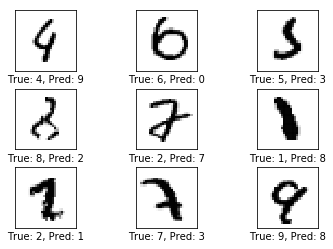

In [64]:
plot_example_errors(class_pred)

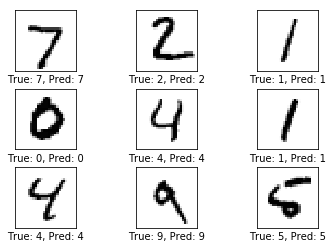

In [65]:
plot_example_classified(class_pred)

## Save & Load Model

In [66]:
path_model = 'Sequential-model.keras'
model.save(path_model)

In [67]:
# Delete the model from memory so we are sure it is no longer used.
del model

In [68]:
# loading the model
from keras.models import load_model
model = load_model(path_model)

In [69]:
images = data.test.images[0:9]

In [70]:
cls_true = data.test.cls[0:9]

In [71]:
y_pred = model.predict(x=images)

In [72]:
class_pred = np.argmax(y_pred, axis=1)

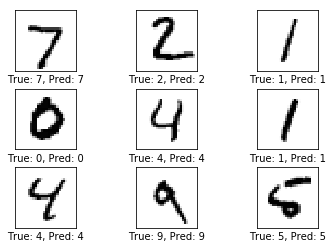

In [73]:
plot_images(images=images,
            class_pred=class_pred,
            class_true=class_true)